In [1]:
import subprocess

In [2]:
# specify dimensions of matrices
dims = [40, 20, 30, 10, 30]

In [3]:
dims_str = f'{len(dims)}\n'
dims_str += ' '.join(map(str, dims))

In [4]:
p = subprocess.Popen(['./build/bin/print_tree'], stdin=subprocess.PIPE, stdout=subprocess.PIPE)
out, err = p.communicate(bytes(dims_str, encoding='utf-8'))

In [5]:
nodes = {}
for node_str in str(out, encoding='utf-8').split('\n')[:-1]:
    node_id = int(node_str[:node_str.find(':')])
    left_id = int(node_str.split()[1])
    right_id = int(node_str.split()[2])
    nodes[node_id] = {'left': left_id, 'right': right_id}

In [6]:
def get_label(node_id):
    if node_id < len(dims):
        return chr(ord('A') + node_id - 1)
    elif 'label' in nodes[node_id]:
        return nodes[node_id]['label']
    else:
        nodes[node_id]['label'] = get_label(nodes[node_id]['left']) + get_label(nodes[node_id]['right'])
        return nodes[node_id]['label']

In [7]:
def get_dims(node_id):
    if node_id < len(dims):
        return (dims[node_id - 1], dims[node_id])
    elif 'dims' in nodes[node_id]:
        return nodes[node_id]['dims']
    else:
        nodes[node_id]['dims'] = (get_dims(nodes[node_id]['left'])[0], get_dims(nodes[node_id]['right'])[1])
        return nodes[node_id]['dims']

In [8]:
dot = 'digraph BST {\n'
dot += '    node [fontname="Arial" ];\n'
dot += '    graph [ordering="out"];'
for i in range(2 * len(nodes) + 1):
    dot += f'    label l{i + 1} [ label = "{get_label(i + 1)}\\n{str(get_dims(i + 1))}"]\n'

dot += '\n'
for key in nodes:
    dot += f'    l{key}  -> l{nodes[key]["left"]}\n'
    dot += f'    l{key}  -> l{nodes[key]["right"]}\n'

dot += '}\n'

In [9]:
with open('tree.dot', 'w') as f:
    print(dot, file=f)

In [10]:
! dot -Tpng tree.dot -o tree.png

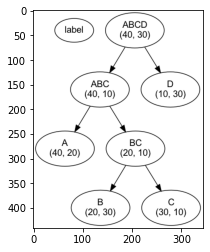

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
imgplot = plt.imshow(img)
plt.show()